In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
video_data = pd.read_csv("/content/drive/MyDrive/Project/eda_video1.csv")

In [ ]:
video_data.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


In [ ]:
video_data.describe()['overall'].T

count    228967.000000
mean          4.085156
std           1.201180
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [ ]:
print('Minimum rating is: %d' %(video_data.overall.min()))
print('Maximum rating is: %d' %(video_data.overall.max()))

Minimum rating is: 1
Maximum rating is: 5


The rating of the product range from 1 to 5.

1 - bad rating

5 - good rating

In [ ]:
#Check for missing values
print('Number of missing values across columns: \n',video_data.isnull().sum())

Number of missing values across columns: 
 Unnamed: 0               0
reviewerID               0
asin                     0
reviewerName            14
reviewText              49
overall                  0
summary                 10
reviewTime               0
Reviews_orignal         44
reviewText + summary     0
reviewPolarity           0
reviewAnalysis           0
dtype: int64


In [ ]:
video_data.dropna(inplace = True)
video_data.reset_index(inplace=True)

In [ ]:
video_data.drop(columns=["index","Unnamed: 0"],inplace=True,axis=1)

In [ ]:
video_data.head(2)

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


In [ ]:
video_data_rec = video_data[["reviewerID","asin","overall","Reviews_orignal"]]

#### 0

In [ ]:
video_data_rec.head(2)

,reviewerID,asin,overall,Reviews_orignal
0,A2HD75EMZR8QLN,0700099867,1,Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,4,If you like rally cars get this game you will ...


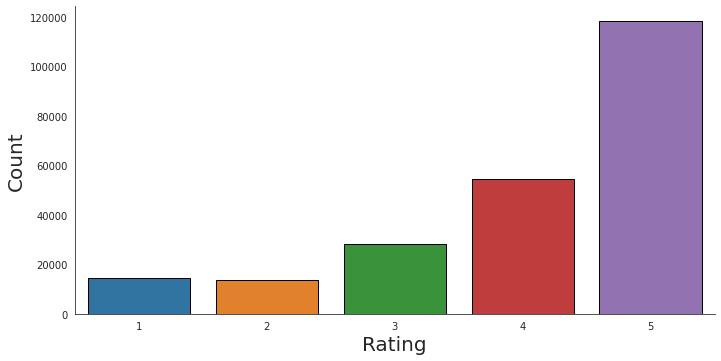

In [ ]:
import warnings
warnings.filterwarnings('ignore')

with sns.axes_style('white'):
    g = sns.factorplot("overall", data=video_data_rec, aspect=2.0,kind='count',edgecolor="black")
    g.set_ylabels("Count",size=20)
    g.set_xlabels("Rating",size=20)

Most of the people has given the rating of 5

In [ ]:
print("\nTotal no of ratings :",video_data_rec.shape[0])
print("Total No of Users   :", len(np.unique(video_data_rec.reviewerID)))
print("Total No of products  :", len(np.unique(video_data_rec.asin)))


Total no of ratings : 228894
Total No of Users   : 24293
Total No of products  : 10672


In [ ]:
# product_rating count 
product_rating_count = video_data_rec.groupby(by='asin')['overall'].count().sort_values(ascending=False)
product_rating_count.head()

asin
B00BGA9WK2    797
B0015AARJI    652
B002VBWIP6    454
B0009VXBAQ    447
B0050SYX8W    440
Name: overall, dtype: int64

In [ ]:
no_of_rated_products_per_user = video_data_rec.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

reviewerID
A3V6Z4RCDGRC44    771
AJKWF4W7QD4NS     634
A3W4D8XOGLWUN5    452
A2QHS1ZCIQOL7E    447
A29BQ6B90Y1R5F    401
Name: overall, dtype: int64

In [ ]:
no_of_rated_products_per_user.describe()

count    24293.000000
mean         9.422220
std         12.723779
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        771.000000
Name: overall, dtype: float64

#### Recomendation System using corelation

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two products .

First, we need to find out the average rating, and the number of ratings each product received.

In [ ]:
video_data_rec.rename({"reviewerID":"Customer_ID","asin":"Product_ID","overall":"Rating","Reviews_orignal":"Reviews"},inplace=True,axis=1)

In [ ]:
video_data_rec.head(1)

,Customer_ID,Product_ID,Rating,Reviews
0,A2HD75EMZR8QLN,0700099867,1,Installing the game was a struggle (because of...


In [ ]:
video_data_rec.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,228894.0,4.085188,1.20115,1.0,4.0,5.0,5.0,5.0


In [ ]:
average_rating = pd.DataFrame(video_data_rec.groupby('Product_ID')['Rating'].mean())
average_rating['Rating_Count'] = pd.DataFrame(video_data_rec.groupby('Product_ID')['Rating'].count())
average_rating.sort_values('Rating_Count', ascending=False).head()

,Rating,Rating_Count
Product_ID,,
B00BGA9WK2,4.382685,797
B0015AARJI,4.599693,652
B002VBWIP6,4.759912,454
B0009VXBAQ,4.463087,447
B0050SYX8W,4.304545,440


#### Finding Meaningful ratings --- 

Suppose one for one product we have one highest rating i.e. one person give one rating only. So, that is not meaningful in this case.

In [ ]:
average_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10672.0,3.988109,0.615617,1.0,3.640963,4.1,4.432497,5.0
Rating_Count,10672.0,21.448088,33.065423,1.0,7.000000,11.0,22.000000,797.0


In [ ]:
average_rating.shape

(10672, 2)

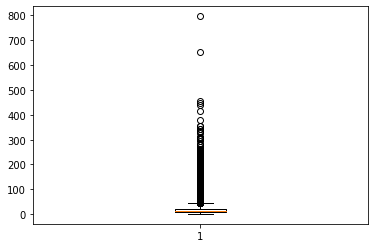

In [ ]:
plt.boxplot(average_rating["Rating_Count"])
plt.show()

In [ ]:
average_rating1 =average_rating[(average_rating["Rating_Count"]>=7) & (average_rating["Rating_Count"]<=22)]

In [ ]:
average_rating1.shape

(5572, 2)

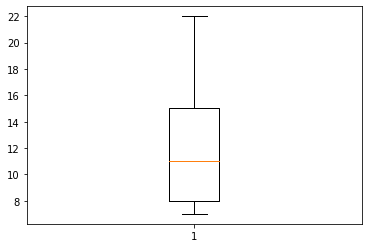

In [ ]:
plt.boxplot(average_rating1["Rating_Count"])
plt.show()

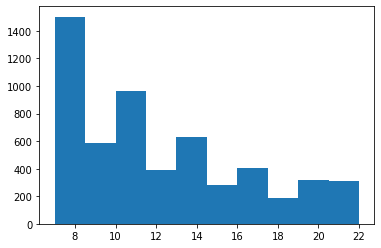

In [ ]:
plt.hist(average_rating1["Rating_Count"])
plt.show()

#### To ensure statistical significance, users with less than 7 ratings, and products with gretter than 22 ratings are excluded.

In [ ]:
counts1 = video_data_rec['Customer_ID'].value_counts()
ratings = video_data_rec[video_data_rec['Customer_ID'].isin(counts1[counts1 >= 7].index)]
counts = video_data_rec['Rating'].value_counts()
ratings = video_data_rec[video_data_rec['Rating'].isin(counts[counts >= 22].index)]

#### Rating matrix (sparse)

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every Customer rated every Product.

In [ ]:
ratings_pivot = video_data_rec.pivot(index='Customer_ID', columns='Product_ID').Rating
Customer_ids = video_data_rec.index
Product_ids = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(24293, 10672)


Product_ID,0700099867,6050036071,7100027950,7293000936,8176503290,907843905X,9625990674,9861019731,9882155456,B000003SQQ,...,B00J128FPA,B00J226358,B00J6DLPLK,B00J9P3KBS,B00JM3R6M6,B00JQ8YH6A,B00JQHU9RC,B00JXW6GE0,B00KAI3KW2,B00KHECZXO
Customer_ID,,,,,,,,,,,,,,,,,,,,,
A00263941WP7WCIL7AKWL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A005481137I9SCAWEF7ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01588502N52TNG1BP7WG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01803182IUSFNIFF5984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A023090719X7MTBCLM19B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
video_data_rec["Product_ID"].mode()

0    B00BGA9WK2
dtype: object

Finding pearson corelation for a particular product

In [ ]:
from IPython.display import display

def recommended_products(Product_id):
  bones_ratings = ratings_pivot[str(Product_id)]
  similar_to_bones = ratings_pivot.corrwith(bones_ratings)
  corr_bones = pd.DataFrame(similar_to_bones, columns=['pearson_corr'])
  corr_bones.dropna(inplace=True)
  corr_summary = corr_bones.join(average_rating['Rating_Count'])
  #print(corr_summary['Rating_Count'].max())
  display(corr_summary[corr_summary['Rating_Count']>=int(corr_summary['Rating_Count'].max()//3)].sort_values('pearson_corr', ascending=False).head(5))

In [ ]:
recommended_products(video_data_rec["Product_ID"].mode().values)

,pearson_corr,Rating_Count
Product_ID,,
B00005TNI6,1.000000,329
B00BGA9WK2,1.000000,797
B003JVKHEQ,1.000000,312
B0000696CZ,0.944444,271
B002I0H79C,0.882498,252


Recomendated products for "B00BGA9WK2" product id is = ["B00005TNI6","B00BGA9WK2","B003JVKHEQ","B0000696CZ","B002I0H79C"]

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg") # Downloading english spacy which has 514k keys, 514k unique vectors (300 dimensions)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


PERSON:      People, including fictional.

NORP:        Nationalities or religious or political groups.

FAC:         Buildings, airports, highways, bridges, etc.

ORG:         Companies, agencies, institutions, etc.

GPE:         Countries, cities, states.

LOC:         Non-GPE locations, mountain ranges, bodies of water.

PRODUCT:     Objects, vehicles, foods, etc. (Not services.)

EVENT:       Named hurricanes, battles, wars, sports events, etc.

WORK_OF_ART: Titles of books, songs, etc.

LAW:         Named documents made into laws.

LANGUAGE:    Any named language.

DATE:        Absolute or relative dates or periods.

TIME:        Times smaller than a day.

PERCENT:     Percentage, including ”%“.

MONEY:       Monetary values, including unit.

QUANTITY:    Measurements, as of weight or distance.

ORDINAL:     “first”, “second”, etc.

CARDINAL:    Numerals that do not fall under another type.

In [ ]:
from collections import Counter 
nlp= spacy.load('en_core_web_lg')  

def find(product_id):
  l = video_data_rec[(video_data_rec["Product_ID"]==product_id)]

  product_names = []
  reviews = []
  c=1
  for j in l.Reviews.unique():
      reviews.append(j)
      product=[]
      count=[]
      d=l[l['Reviews']==j]['Reviews']
      for i in d :
          dat= nlp(i)
          for w in dat.ents:
              if w.label_=='WORK_OF_ART':
                count.append(w.text)
                      
      if count==[]:
        pass
      else:
        a=Counter(count).most_common(1)[:1][0][0]
        product_names.append(a)
      
      c+=1
  return product_names

In [ ]:
find("B00BGA9WK2")

['Blacklight Retribution, War Frame',
 'Tomb Raider',
 'Call of Duty, Watch Dogs',
 'thisThe GOOD+ My PS4',
 'Destiny, Watch Dogs',
 'hint hint).Good Stuff',
 'Love',
 'Ghosts',
 'Need for Speed',
 'Black Flag',
 '720p - 1080p',
 'NES',
 'Options and Share',
 'Ghosts',
 'Love',
 'AC IV: BF',
 'The Show',
 'Knack.1 - Speed',
 'Knack',
 'Sony.- Cross Game Chat.-',
 'The Show',
 'Call of Duty and Battlefield',
 'Call of Duty',
 'Call of Duty Ghosts, Battlefield 4',
 'The Last of Us',
 'Playstations',
 'chance.-',
 'Playstations',
 'Pulsing Blue Light',
 'Fallout and Skyrim',
 'COD Ghosts',
 'FiiO E7 or E09k',
 'Tomb Raider Definitive Edition and Thief',
 'Perfect Dark Zero',
 'Call of Duty, Battlefield, Batman, Uncharted',
 'Titanfall and Halo',
 'USB Memory Sticks',
 'TV Remote',
 'The Remote Play',
 'Pros and Cons',
 'The Show 14',
 'Titanfall',
 'Call of Duty: Ghosts',
 'Mario 3D World',
 'Metro Last Light',
 'the PS2 or PS3',
 'Call Of Duty Ghost',
 "'Live on PlayStation'",
 'Call of 

B00BGA9WK2 = Call of Duty Ghost

#### 1-5

In [ ]:
find("B00005TNI6")

['Dragonball Z',
 'Skies Of Arcadia',
 'Threads of Fate and Saga Frontier',
 'FF7',
 'quot;leveling system,&quot',
 '&quot;world',
 'Super Mario RPG',
 'Ultima',
 'Love',
 'the Elder Scrolls',
 'The Legend of Dragoon',
 'FF7',
 'Godly Cloud',
 'Devil May Cry, Ico, Oni and so',
 'Metal Gear Solid 2',
 'Xenogears',
 'Metamorphosis',
 'fantasy7',
 'Mist or Halo',
 'Active Time Battle',
 'The Play Station',
 'Sphere Levels',
 'Best of Ys, Elemental Gearbolt, FF7, FF6',
 'love',
 'To Zanarkand',
 'RPG.Main Characters',
 'Pray-NOW',
 'FF7',
 'Aeons',
 'VII and IX',
 'Final Fantasy for the',
 'League Play',
 'Fantasies',
 'X-2',
 'Tekken',
 'quot;The Wonder Years,&quot',
 'Warcraft',
 'Phenominal Story',
 'Grid*Battle System revisements*MusicCons',
 'again!The story',
 "a Charlie's Angels",
 'Game and Cut-SceneThis',
 'Grammy',
 'Shadow Hearts',
 'Wonderful Music',
 'voices)You Play',
 'Cloister of Trials',
 'The Bouncer',
 'a Final Fantasy',
 'X-2',
 'Greatest RPG Ever Crafted',
 'Star Trek'

B00005TNI6 = "Devil May Cry"

In [ ]:
find("B00BGA9WK2")

['Blacklight Retribution, War Frame',
 'Tomb Raider',
 'Call of Duty, Watch Dogs',
 'thisThe GOOD+ My PS4',
 'Destiny, Watch Dogs',
 'hint hint).Good Stuff',
 'Love',
 'Ghosts',
 'Need for Speed',
 'Black Flag',
 '720p - 1080p',
 'NES',
 'Options and Share',
 'Ghosts',
 'Love',
 'AC IV: BF',
 'The Show',
 'Knack.1 - Speed',
 'Knack',
 'Sony.- Cross Game Chat.-',
 'The Show',
 'Call of Duty and Battlefield',
 'Call of Duty',
 'Call of Duty Ghosts, Battlefield 4',
 'The Last of Us',
 'Playstations',
 'chance.-',
 'Playstations',
 'Pulsing Blue Light',
 'Fallout and Skyrim',
 'COD Ghosts',
 'FiiO E7 or E09k',
 'Tomb Raider Definitive Edition and Thief',
 'Perfect Dark Zero',
 'Call of Duty, Battlefield, Batman, Uncharted',
 'Titanfall and Halo',
 'USB Memory Sticks',
 'TV Remote',
 'The Remote Play',
 'Pros and Cons',
 'The Show 14',
 'Titanfall',
 'Call of Duty: Ghosts',
 'Mario 3D World',
 'Metro Last Light',
 'the PS2 or PS3',
 'Call Of Duty Ghost',
 "'Live on PlayStation'",
 'Call of 

B00BGA9WK2 = Blacklight Retribution

In [ ]:
find("B003JVKHEQ")

['cod games',
 'Halo, Gears and Rainbow Six',
 'Combat Training',
 'the Call of Duty series',
 '3).The Zombies',
 'a Call of Duty',
 'Halo: Reach',
 'Veteran',
 'the Gun Game',
 'Zombies',
 'Halo',
 'Call of Duty',
 'Love',
 'Black Ops',
 'same.- Voice',
 'Call of Duty: Black Ops',
 'Zombie Mode',
 'Call of Duty: Black Ops',
 'a Call of Duty',
 'a Call of Duty multiplayer game',
 'Call of Duty - We',
 'Freaking Doom',
 'Call of Duty 4',
 'a Call of Duty',
 'Halo',
 'Halo Reach',
 'Black Ops',
 'Battle field 2',
 'Call of Duty',
 'Call of Duty: Black Ops',
 'the Call of Duty series',
 'Medal of Honor',
 'Zombies',
 'a Sequel to Modern Warfare',
 'Call of Duty',
 'Call of Duty 4',
 'Guitar Hero',
 'Gears of War',
 'Game',
 'Call of Duty',
 'the Call of Duty series',
 'the cod franchise.i',
 'the Create a Class 2.0',
 'Blow Stuff Up Objectives',
 'the Call of Duty',
 'M16)- The Crossbow',
 'Zombies',
 'a Call of Duty',
 'Hardcore',
 'Inglorious Basterds',
 'Call of Duty: World at War',
 '

B003JVKHEQ = Call of Duty: Black Ops

In [ ]:
find("B0000696CZ")

['Vic Vance",black;but',
 'Flock of Seagulls',
 'Grand Theft Auto',
 'Super Rockin',
 'State of Emergency"',
 'Vice City',
 'Rusty Donuts',
 'The Wave',
 'The "Death Row',
 'Grand Theft Auto III',
 'Citizen Arrests',
 'adventure???The action',
 'Grand Theft Auto',
 'Flash FM',
 'Vice City',
 'Love Songs',
 'CarsLots of missions- Fake',
 'Stories',
 'The Two Towers',
 'The Clash',
 'The Guy',
 'Grand Theft Auto 3',
 'Flock of Seagulls"Out of Touch',
 'The Lost, Tomb Raider: Angel of Darkness and',
 'Mission Mode',
 'Scar Face',
 'First Blood and Rambo Part II.Grand Theft Auto',
 'Mafiaso Masterpiece',
 'The Guy']

B0000696CZ = Tomb Raider: Angel of Darkness

In [ ]:
find("B002I0H79C")

['Gear',
 'Grub Killer',
 'Gears of War',
 'Call of Duty',
 'Halo',
 'Gears of War',
 'Gears of War or GOW2',
 'Gears of War',
 'the Double Barrel Shotgun',
 'Capture the Flag',
 'horde 2.0',
 'Gears of War 3',
 'Bekka',
 'Easter Eggs"(little',
 'Gear',
 'Gears 2',
 'Halo, Mass Effect',
 'Game of The Year',
 'Players Choice',
 '"Mad World',
 'The Gears of War',
 'Gears of War 2',
 'Shotgun the Game 3',
 'Call of Duty 4:Modern Warfare',
 'Modern Warfare or Battlefield, Gears',
 '9/10The Gears Trilogy Concludes',
 'Cole Train',
 'Battlefield, Modern Warfare',
 'Horde from Gears 2',
 'Gears of War 3',
 'Call of Duty',
 'Horde from Gears 2',
 'The Gears of War series',
 'Gears of War 3']

B002I0H79C = Call of Duty 4:Modern Warfare

For the video game "B00BGA9WK2" = "Call of Duty Ghost"

We have recommended games like ----

B00005TNI6 = "Devil May Cry"

B00BGA9WK2 = "Blacklight Retribution"

B003JVKHEQ = "Call of Duty: Black Ops"

B0000696CZ = "Tomb Raider: Angel of Darkness"

B002I0H79C = "Call of Duty 4:Modern Warfare"